In [1]:
from HelperFunctions import *

c:\Users\tjmaz\anaconda3\envs\ImageDeblur\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\tjmaz\anaconda3\envs\ImageDeblur\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an 

In [2]:
check_gpu()

TensorFlow is using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
dataset_directory = '../ImageSets/TrainingImages'
all_image_paths = get_image_paths(dataset_directory)
train_paths, val_paths, test_paths = train_val_test_split(all_image_paths) 

In [4]:
clear_train, clear_val, clear_test = create_train_val_test_datasets(train_paths, val_paths, test_paths)
clear_train, clear_val, clear_test = load_train_val_test_images(clear_train, clear_val, clear_test)
clear_train, clear_val, clear_test = preprocess_train_val_test_images(clear_train, clear_val, clear_test)
blurred_train, blurred_val, blurred_test = blur_train_val_test_images(clear_train, clear_val, clear_test)

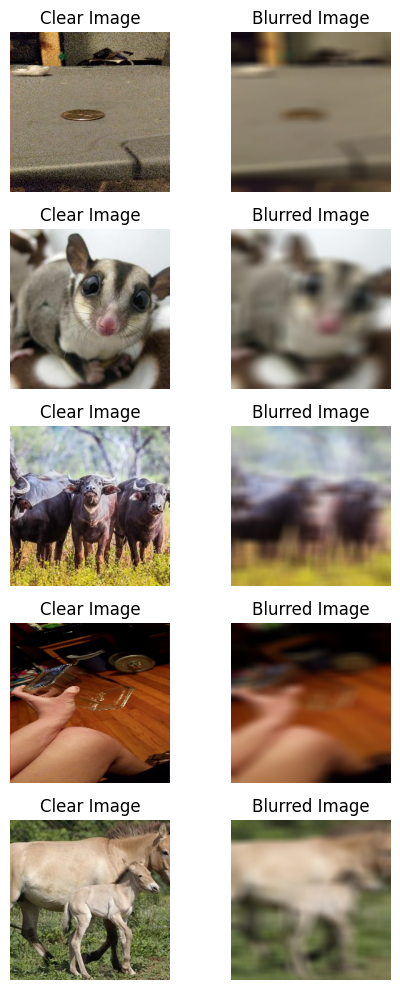

In [5]:
display_sample_images(clear_train, blurred_train)

In [6]:
input_shape = (256, 256, 3)
model = load_and_compile_model(input_shape, model_directory = None, output_summary = True, deeper_model = True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [7]:
train_data, validation_data, test_data = zip_train_val_test_images(blurred_train, clear_train, blurred_val, clear_val, blurred_test, clear_test)
train_data, validation_data, test_data = batch_train_val_test_images(train_data, validation_data, test_data)

In [8]:
history = model.fit(train_data, validation_data = validation_data, epochs=50) 

Epoch 1/50
2733/2733 [==============================] - 1214s 432ms/step - loss: 0.0057 - accuracy: 0.8509 - val_loss: 0.0101 - val_accuracy: 0.8553
Epoch 2/50
2733/2733 [==============================] - 1180s 431ms/step - loss: 0.0036 - accuracy: 0.8653 - val_loss: 0.0101 - val_accuracy: 0.8660
Epoch 3/50
2733/2733 [==============================] - 1181s 431ms/step - loss: 0.0032 - accuracy: 0.8693 - val_loss: 0.0100 - val_accuracy: 0.8532
Epoch 4/50
2733/2733 [==============================] - 1182s 432ms/step - loss: 0.0029 - accuracy: 0.8723 - val_loss: 0.0102 - val_accuracy: 0.8682
Epoch 5/50
2733/2733 [==============================] - 1182s 432ms/step - loss: 0.0028 - accuracy: 0.8775 - val_loss: 0.0103 - val_accuracy: 0.8311
Epoch 6/50
2733/2733 [==============================] - 1182s 432ms/step - loss: 0.0027 - accuracy: 0.8777 - val_loss: 0.0104 - val_accuracy: 0.8613
Epoch 7/50
2733/2733 [==============================] - 1182s 432ms/step - loss: 0.0026 - accuracy: 0.8820

In [9]:
model.save("./Models/DeeperImageDeblurModel.h5")

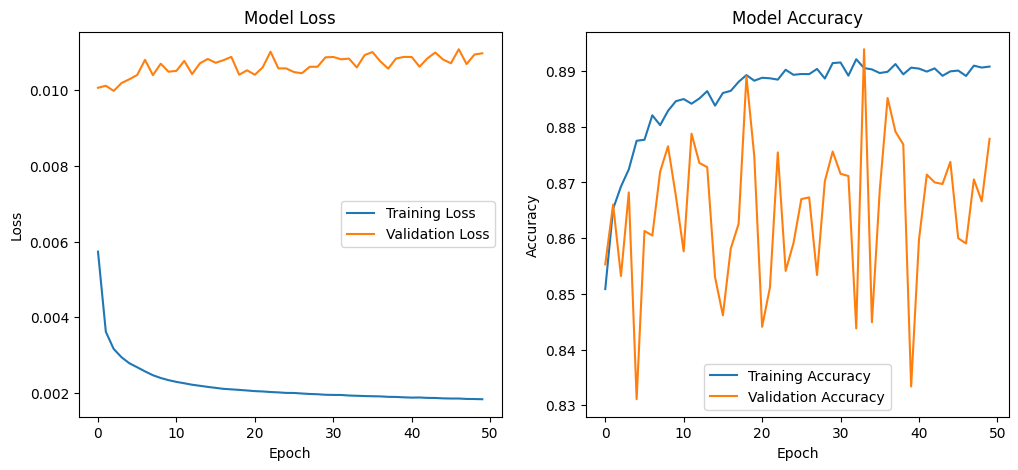

In [10]:
display_training_plots(history)

1/1 [==============================] - 0s 229ms/step


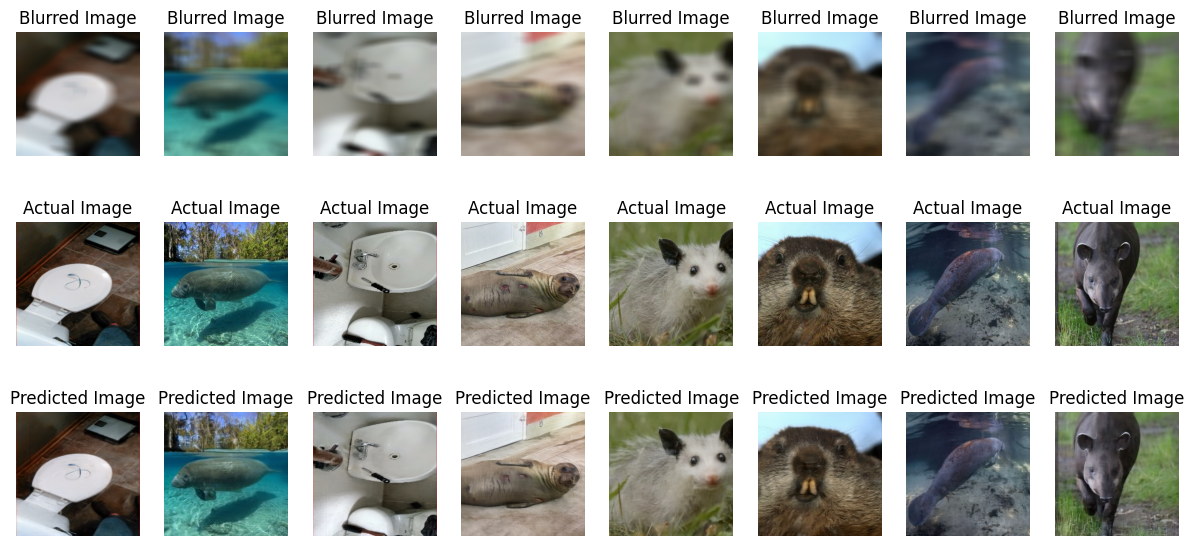

In [11]:
test_images, test_labels, pred_images = get_test_batch(model, test_data)
display_predictions(test_images, test_labels, pred_images)